# Load Risk Pridiction

## 1.load data

In [1]:
import pandas as pd

In [3]:
load_data = pd.read_csv('data/code_data/data/load/LoanStats3a.csv',skiprows=1,low_memory=False)

In [4]:
load_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
load_data = load_data.dropna(axis=1,how='all')
load_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,May-17,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,Oct-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,May-17,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,Apr-16,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,Jan-17,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


## 2.select feature and data clean

In [6]:
load_data_clean = load_data[['loan_amnt','funded_amnt','term','int_rate','installment',
                            'emp_length','dti','annual_inc','total_pymnt','total_pymnt_inv',
                             'total_rec_int','loan_status']]

In [7]:
load_data_clean.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,dti,annual_inc,total_pymnt,total_pymnt_inv,total_rec_int,loan_status
0,5000.0,5000.0,36 months,10.65%,162.87,10+ years,27.65,24000.0,5863.155187,5833.84,863.16,Fully Paid
1,2500.0,2500.0,60 months,15.27%,59.83,< 1 year,1.00,30000.0,1014.530000,1014.53,435.17,Charged Off
2,2400.0,2400.0,36 months,15.96%,84.33,10+ years,8.72,12252.0,3005.666844,3005.67,605.67,Fully Paid
3,10000.0,10000.0,36 months,13.49%,339.31,10+ years,20.00,49200.0,12231.890000,12231.89,2214.92,Fully Paid
4,3000.0,3000.0,60 months,12.69%,67.79,1 year,17.94,80000.0,4066.908161,4066.91,1066.91,Fully Paid


In [8]:
del load_data

In [9]:
import re
def extract_number(string):
    num = re.findall('\d+',str(string))
    if len(num) > 0:
        return int(num[0])
    else:
        return 0
load_data_clean.emp_length = load_data_clean.emp_length.apply(extract_number)
load_data_clean.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,dti,annual_inc,total_pymnt,total_pymnt_inv,total_rec_int,loan_status
0,5000.0,5000.0,36 months,10.65%,162.87,10,27.65,24000.0,5863.155187,5833.84,863.16,Fully Paid
1,2500.0,2500.0,60 months,15.27%,59.83,1,1.00,30000.0,1014.530000,1014.53,435.17,Charged Off
2,2400.0,2400.0,36 months,15.96%,84.33,10,8.72,12252.0,3005.666844,3005.67,605.67,Fully Paid
3,10000.0,10000.0,36 months,13.49%,339.31,10,20.00,49200.0,12231.890000,12231.89,2214.92,Fully Paid
4,3000.0,3000.0,60 months,12.69%,67.79,1,17.94,80000.0,4066.908161,4066.91,1066.91,Fully Paid


In [10]:
load_data_clean.term = load_data_clean.term.apply(extract_number)
load_data_clean.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,dti,annual_inc,total_pymnt,total_pymnt_inv,total_rec_int,loan_status
0,5000.0,5000.0,36,10.65%,162.87,10,27.65,24000.0,5863.155187,5833.84,863.16,Fully Paid
1,2500.0,2500.0,60,15.27%,59.83,1,1.00,30000.0,1014.530000,1014.53,435.17,Charged Off
2,2400.0,2400.0,36,15.96%,84.33,10,8.72,12252.0,3005.666844,3005.67,605.67,Fully Paid
3,10000.0,10000.0,36,13.49%,339.31,10,20.00,49200.0,12231.890000,12231.89,2214.92,Fully Paid
4,3000.0,3000.0,60,12.69%,67.79,1,17.94,80000.0,4066.908161,4066.91,1066.91,Fully Paid


In [11]:
load_data_clean.int_rate[0]

'10.65%'

In [12]:
load_data_clean.int_rate = load_data_clean.int_rate.apply(lambda x: float(str(x).replace("%",'')))

In [13]:
load_data_clean.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,dti,annual_inc,total_pymnt,total_pymnt_inv,total_rec_int,loan_status
0,5000.0,5000.0,36,10.65,162.87,10,27.65,24000.0,5863.155187,5833.84,863.16,Fully Paid
1,2500.0,2500.0,60,15.27,59.83,1,1.00,30000.0,1014.530000,1014.53,435.17,Charged Off
2,2400.0,2400.0,36,15.96,84.33,10,8.72,12252.0,3005.666844,3005.67,605.67,Fully Paid
3,10000.0,10000.0,36,13.49,339.31,10,20.00,49200.0,12231.890000,12231.89,2214.92,Fully Paid
4,3000.0,3000.0,60,12.69,67.79,1,17.94,80000.0,4066.908161,4066.91,1066.91,Fully Paid


In [14]:
load_data_clean.describe()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,dti,annual_inc,total_pymnt,total_pymnt_inv,total_rec_int
count,42535.000000,42535.000000,42542.000000,42535.000000,42535.000000,42542.000000,42535.000000,4.253100e+04,42535.000000,42535.000000,42535.000000
mean,11089.722581,10821.585753,42.200273,12.165016,322.623063,4.912581,13.373043,6.913656e+04,12018.808795,11311.681545,2239.981444
std,7410.938391,7146.914675,10.522413,3.707936,208.927216,3.461882,6.726315,6.409635e+04,9093.941023,9037.914000,2585.057393
min,500.000000,500.000000,0.000000,5.420000,15.670000,0.000000,0.000000,1.896000e+03,0.000000,0.000000,0.000000
25%,5200.000000,5000.000000,36.000000,9.630000,165.520000,2.000000,8.200000,4.000000e+04,5464.404073,4791.415000,657.100000
50%,9700.000000,9600.000000,36.000000,11.990000,277.690000,4.000000,13.470000,5.900000e+04,9682.061225,8955.870000,1339.160000
75%,15000.000000,15000.000000,60.000000,14.720000,428.180000,9.000000,18.680000,8.250000e+04,16425.369950,15538.820000,2803.090000
max,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,29.990000,6.000000e+06,58886.473430,58563.680000,23886.470000


## 3.exploratory data analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

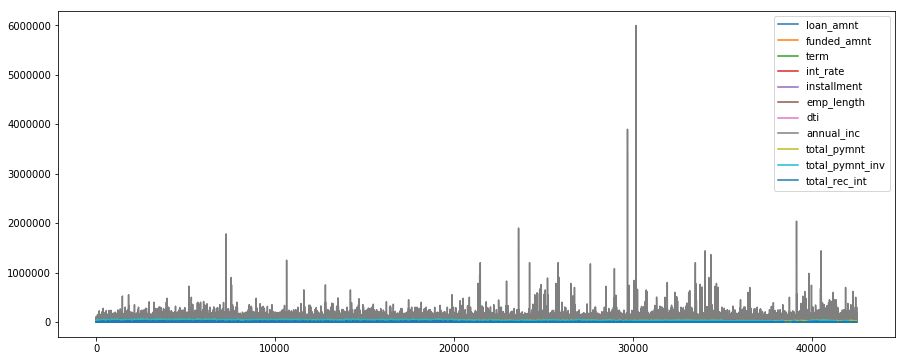

In [16]:
load_data_clean.plot(figsize=(15,6))

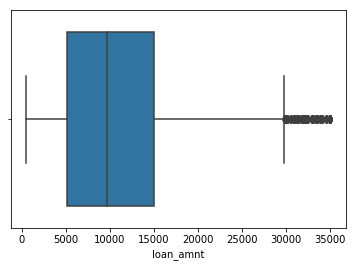

In [17]:
sns.boxplot(x=load_data_clean.loan_amnt)

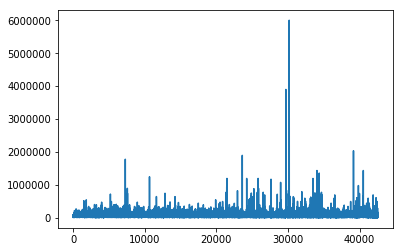

In [18]:
load_data_clean.annual_inc.plot()

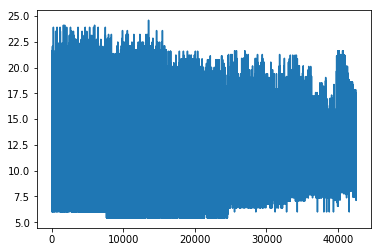

In [19]:
load_data_clean.int_rate.plot()

Text(0, 0.5, 'installment')

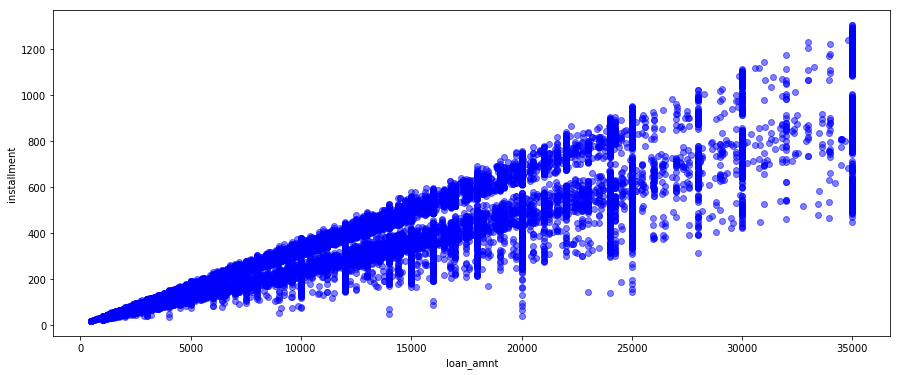

In [20]:
plt.figure(figsize=(15,6))
plt.scatter(load_data_clean.loan_amnt,load_data_clean.installment,c='b',alpha=0.5)
plt.xlabel('loan_amnt')
plt.ylabel('installment')

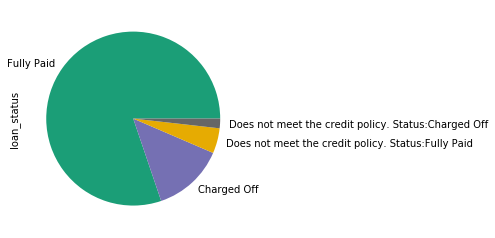

In [21]:
load_data_clean.loan_status.value_counts().plot(kind='pie',colormap='Dark2')

In [22]:
def correct_label(string):
    if 'not' in str(string) or not str(string):
        return 'reject'
    else:
        return str(string).replace(' ','_')

In [23]:
load_data_clean.loan_status = load_data_clean.loan_status.apply(correct_label)

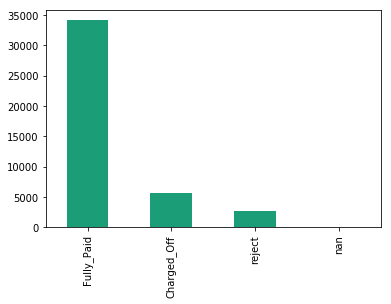

In [25]:
load_data_clean.loan_status.value_counts().plot(kind='bar',colormap='Dark2')

In [26]:
load_data_clean[pd.isnull(load_data_clean).any(axis=1)]

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,dti,annual_inc,total_pymnt,total_pymnt_inv,total_rec_int,loan_status
39786,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,nan
39787,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,nan
39788,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,nan
42452,5000.0,5000.0,36,7.43,155.38,1,1.0,NaN,5593.631614,3384.14,593.63,reject
42453,7000.0,7000.0,36,7.75,218.55,1,1.0,NaN,7867.655865,3877.63,867.66,reject
42483,6700.0,6700.0,36,7.75,209.18,1,1.0,NaN,7530.481427,7530.48,830.48,reject
42536,6500.0,6500.0,36,8.38,204.84,1,4.0,NaN,7373.904962,0.00,873.90,reject
42538,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,nan
42539,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,nan
42540,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,nan


In [27]:
load_data_clean = load_data_clean[pd.isnull(load_data_clean).any(axis=1)!=True]

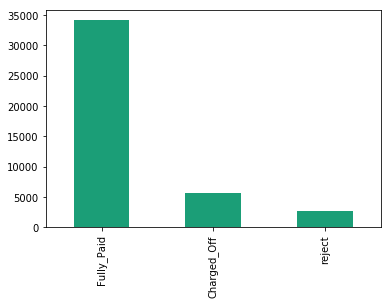

In [28]:
load_data_clean.loan_status.value_counts().plot(kind='bar',colormap='Dark2')

## 4.build model and training model

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

## GaussianNB http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf

In [33]:
load_data_clean.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,dti,annual_inc,total_pymnt,total_pymnt_inv,total_rec_int,loan_status
0,5000.0,5000.0,36,10.65,162.87,10,27.65,24000.0,5863.155187,5833.84,863.16,Fully_Paid
1,2500.0,2500.0,60,15.27,59.83,1,1.00,30000.0,1014.530000,1014.53,435.17,Charged_Off
2,2400.0,2400.0,36,15.96,84.33,10,8.72,12252.0,3005.666844,3005.67,605.67,Fully_Paid
3,10000.0,10000.0,36,13.49,339.31,10,20.00,49200.0,12231.890000,12231.89,2214.92,Fully_Paid
4,3000.0,3000.0,60,12.69,67.79,1,17.94,80000.0,4066.908161,4066.91,1066.91,Fully_Paid


In [34]:
Y = load_data_clean.loan_status
Y.head()

0     Fully_Paid
1    Charged_Off
2     Fully_Paid
3     Fully_Paid
4     Fully_Paid
Name: loan_status, dtype: object

In [35]:
X = load_data_clean.drop('loan_status',axis=1)
X.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,dti,annual_inc,total_pymnt,total_pymnt_inv,total_rec_int
0,5000.0,5000.0,36,10.65,162.87,10,27.65,24000.0,5863.155187,5833.84,863.16
1,2500.0,2500.0,60,15.27,59.83,1,1.00,30000.0,1014.530000,1014.53,435.17
2,2400.0,2400.0,36,15.96,84.33,10,8.72,12252.0,3005.666844,3005.67,605.67
3,10000.0,10000.0,36,13.49,339.31,10,20.00,49200.0,12231.890000,12231.89,2214.92
4,3000.0,3000.0,60,12.69,67.79,1,17.94,80000.0,4066.908161,4066.91,1066.91


In [37]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [38]:
X_train.head()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,dti,annual_inc,total_pymnt,total_pymnt_inv,total_rec_int
38112,2800.0,2800.0,36,9.32,89.46,5,23.86,34000.00,3235.865012,2899.46,420.87
33894,4000.0,4000.0,36,7.74,124.88,9,17.64,28500.00,4495.670084,4495.67,495.67
32708,12000.0,12000.0,36,10.99,392.83,9,4.47,95000.00,13444.628370,13360.60,1444.63
40055,10000.0,10000.0,60,17.56,251.55,10,24.78,75597.48,6439.730000,5929.15,3034.11
33150,13000.0,13000.0,36,11.48,428.59,2,6.00,45000.00,9465.410000,9447.26,2054.53


In [39]:
gnb_model = GaussianNB()
gnb_model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## 5.predict and score the model 

In [40]:
probs = gnb_model.predict_proba(X_test)
print(probs)

[[3.52704383e-03 9.95812425e-01 6.60531359e-04]
 [1.65715733e-01 8.24489657e-01 9.79461002e-03]
 [2.62021072e-01 7.15527866e-01 2.24510620e-02]
 ...
 [1.28867104e-01 4.83520120e-01 3.87612776e-01]
 [9.52526329e-02 5.53524715e-01 3.51222652e-01]
 [8.04808733e-02 7.54314134e-01 1.65204993e-01]]


In [41]:
predict = gnb_model.predict(X_test)
print(predict)

['Fully_Paid' 'Fully_Paid' 'Fully_Paid' ... 'Fully_Paid' 'Fully_Paid'
 'Fully_Paid']


In [42]:
metrics.confusion_matrix(Y_test,predict)

array([[ 468,  923,  391],
       [ 167, 8769, 1241],
       [  42,  417,  342]])

In [43]:
print(metrics.classification_report(Y_test,predict))

              precision    recall  f1-score   support

 Charged_Off       0.69      0.26      0.38      1782
  Fully_Paid       0.87      0.86      0.86     10177
      reject       0.17      0.43      0.25       801

   micro avg       0.75      0.75      0.75     12760
   macro avg       0.58      0.52      0.50     12760
weighted avg       0.80      0.75      0.76     12760

